https://www.codearmo.com/python-tutorial/options-trading-bull-and-bear-spread-strategies
    
**Code is taken from this website**

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 

In [10]:
class Option:
    def __init__(self, type_, K, price, side):
        self.type = type_
        self.K = K
        self.price = price
        self.side = side
    
    def __repr__(self):
        side = 'long' if self.side == 1 else 'short'
        return f'Option(type={self.type},K={self.K}, price={self.price},side={side})'

class OptionStrat:
    def __init__(self, name, S0, params=None):
        self.name = name
        self.S0 = S0
        if params:
            self.STs=np.arange(params.get('start',0),
                               params.get('stop', S0*2), params.get('by',1))
        else:
            self.STs = np.arange(0, S0*2, 1)
        self.payoffs = np.zeros_like(self.STs)
        self.instruments = [] 
           
    def long_call(self, K, C, Q=1):

        payoffs =  np.array([max(s-K,0)  - C for s in self.STs])*Q
        self.payoffs = self.payoffs +payoffs
        self._add_to_self('call', K, C, 1, Q)
    
    def short_call(self, K, C, Q=1):
        payoffs =  np.array([max(s-K,0) * -1 + C for s in self.STs])*Q
        self.payoffs = self.payoffs + payoffs
        self._add_to_self('call', K, C, -1, Q)
    
    def long_put(self, K, P, Q=1):
        payoffs = np.array([max(K-s,0) - P for s in self.STs])*Q
        self.payoffs = self.payoffs + payoffs
        self._add_to_self('put', K, P, 1, Q)
      
    def short_put(self, K, P, Q=1):
        payoffs = np.array([max(K-s,0)*-1 + P for s in self.STs])*Q
        self.payoffs = self.payoffs + payoffs
        self._add_to_self('put', K, P, -1, Q)
        
    def _add_to_self(self, type_, K, price, side, Q):
        o = Option(type_, K, price, side)
        for _ in range(Q):
            self.instruments.append(o)
        
          
    def plot(self, **params):
        plt.plot(self.STs, self.payoffs,**params)
        plt.title(f"Payoff Diagram for {self.name}")
        plt.fill_between(self.STs, self.payoffs,
                         where=(self.payoffs >= 0), facecolor='g', alpha=0.4)
        plt.fill_between(self.STs, self.payoffs,
                         where=(self.payoffs < 0), facecolor='r', alpha=0.4)
        
        plt.xlabel(r'$S_T$')
        plt.ylabel('Profit in $')
        plt.show()
        
    def describe(self):
        max_profit  = self.payoffs.max()
        max_loss = self.payoffs.min()
        print(f"Max Profit: ${round(max_profit,3)}")
        print(f"Max loss: ${round(max_loss,3)}")
        c = 0
        for o in self.instruments:
            print(o)
            if o.type == 'call' and o.side==1:
                c += o.price
            elif o.type == 'call' and o.side == -1:
                c -= o.price
            elif o.type =='put' and o.side == 1:
                c += o.price
            elif o.type =='put' and o.side == -1:
                c -+ o.price
        
        print(f"Cost of entering position ${c}")

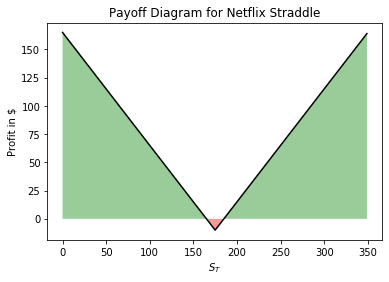

In [14]:
obj = OptionStrat('Netflix Straddle', 175)
obj.long_put(175,5)
obj.long_call(175, 5)
obj.plot(color='black')

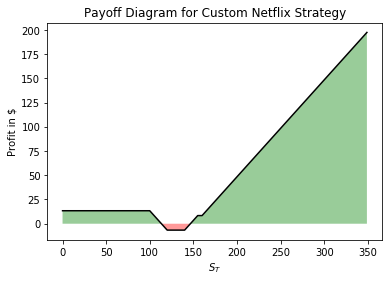

In [16]:
obj = OptionStrat('Custom Netflix Strategy', 175)
obj.long_call(160,2, 1)
obj.long_call(140,4 , 1)
obj.short_call(155,0.75,1)
obj.long_put(120, 2, 1)
obj.short_put(100, 0.65, 1)
obj.plot(color='black')